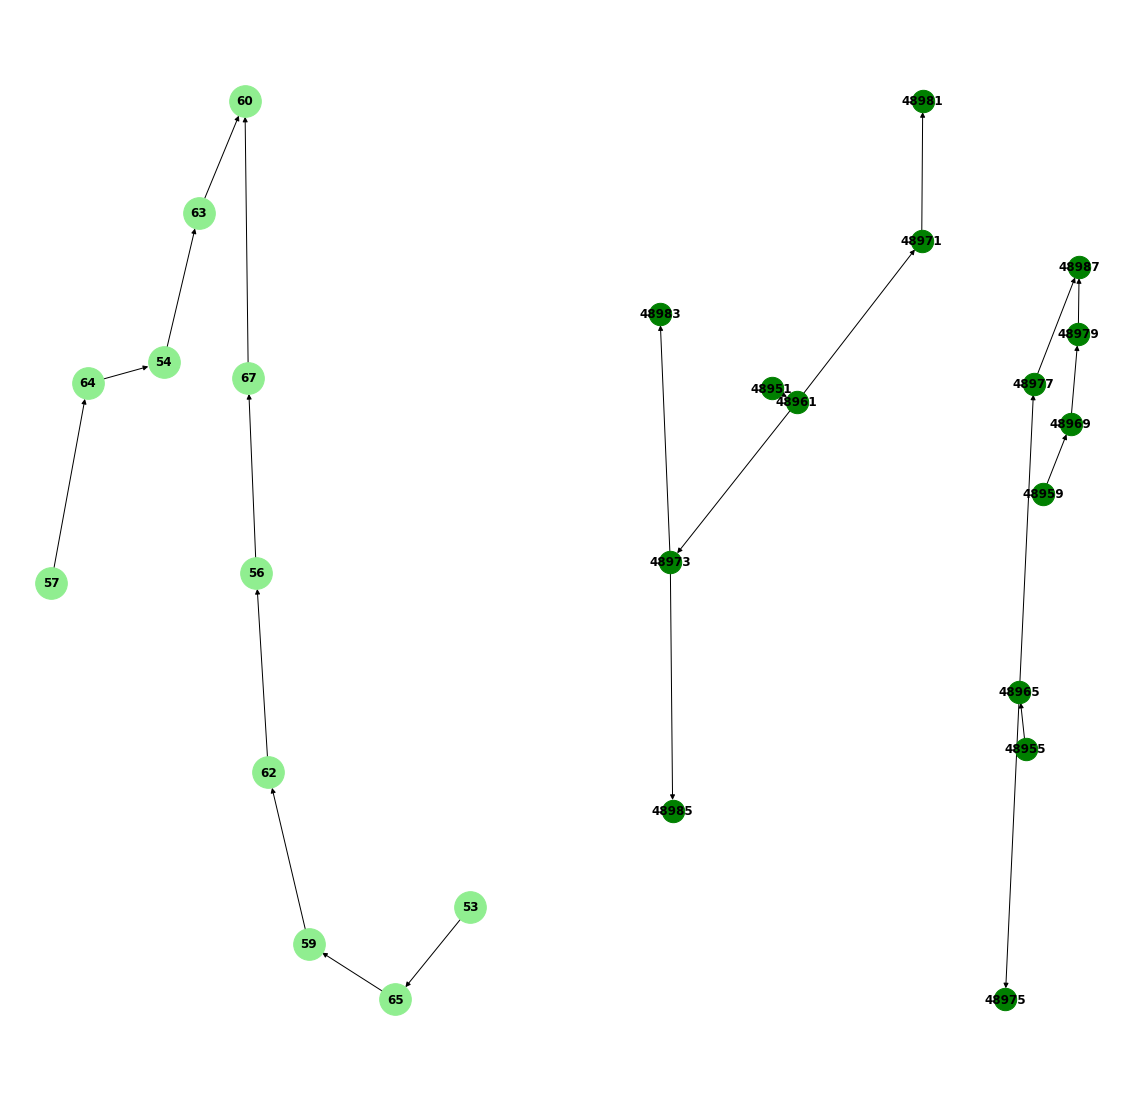

In [1]:
from GraphBasedDistanceMeasure import ScenarioGraph
from commonroad.common.file_reader import CommonRoadFileReader
import networkx as nx
import matplotlib.pyplot as plt

# generate path of the file to be opened
#file_path = "data_files/ZAM_Tutorial-1_1_T-1.xml"
#file_path2 = "data_files/ZAM_Tjunction-1_66_T-1.xml"
file_path = "data_files/CHN_Cho-2_1_T-1.xml"
file_path2 = "data_files/DEU_A9-1_1_T-1.xml"

# read in the scenario and planning problem set
crf = CommonRoadFileReader(file_path)
scenario, planning_problem_set = crf.open()

crf2 = CommonRoadFileReader(file_path2)
scenario2, planning_problem_set2 = crf2.open()

#for graph attributes
options1 = {
    'node_color': 'lightgreen',
    'node_size': 1000,
    'width': 1,
}

options2 = {
    'node_color': 'green',
    'node_size': 500,
    'width': 1,
}

plt.rcParams['figure.figsize'] = (20.0, 20.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

#################################BRIEF USAGE###############################################
###########################################################################################
#############################GBDM Sample Usage ############################################
###########################################################################################
#Creata an ScenariGraph object
SG_1 = ScenarioGraph(scenario, planning_problem_set)
SG_2 = ScenarioGraph(scenario2, planning_problem_set2)
#SG_1.CreateLaneletGraph()  #you dont need to create graph. It created in constructer method

plt.subplot(1, 2, 1)
nx.draw(SG_1.scenario_graph,with_labels=True, font_weight='bold', **options1)
plt.subplot(1, 2, 2)
nx.draw(SG_2.scenario_graph,with_labels=True, font_weight='bold', **options2)
plt.show()

In [2]:
SG_1 = ScenarioGraph(scenario, planning_problem_set)
print (SG_1.vehicle_objects_dict)
vehicle_objects = SG_1.vehicle_objects_dict


for vehicle_dict_id in vehicle_objects:
    print("vehicle object:  ", vehicle_objects[vehicle_dict_id])
    print("vehicle_info:    ", vehicle_objects[vehicle_dict_id].vehicle_info)
    
    #Initial_state usage
    print("**vehicle_info.initial_state:    ", (vehicle_objects[vehicle_dict_id].vehicle_info["initial_state"]))
    print("vehicle_initial_state:    ", vehicle_objects[vehicle_dict_id].vehicle_initial_state)
    print("vehicle_initial_state.velocity:    ", vehicle_objects[vehicle_dict_id].vehicle_initial_state.velocity)
    print("vehicle_initial_state.position:    ", vehicle_objects[vehicle_dict_id].vehicle_initial_state.position)
    
    
    print("vehicle_graph:   ", vehicle_objects[vehicle_dict_id].vehicle_graph)
    print("distance_sensor: ", vehicle_objects[vehicle_dict_id].distance_sensor)
    print("distance_sensor.vehicles_in_range: ", vehicle_objects[vehicle_dict_id].distance_sensor.vehicles_in_range)
    #print("score_array:     ", vehicle_objects[vehicle_dict_id].score_array)
    #print("group_array:     ", vehicle_objects[vehicle_dict_id].group_array)
    #print("knowledge_base:  ", vehicle_objects[vehicle_dict_id].knowledge_base)
    
    print("___________________________________________________________________________________________________")

{-1: <Vehicle.Vehicle object at 0x7fc09014d8d0>, 35: <Vehicle.Vehicle object at 0x7fc06189ef90>, 39: <Vehicle.Vehicle object at 0x7fc06189e350>, 311: <Vehicle.Vehicle object at 0x7fc06189e950>, 313: <Vehicle.Vehicle object at 0x7fc06189ebd0>, 315: <Vehicle.Vehicle object at 0x7fc06189e3d0>, 317: <Vehicle.Vehicle object at 0x7fc06189e310>, 318: <Vehicle.Vehicle object at 0x7fc06189e550>, 319: <Vehicle.Vehicle object at 0x7fc06189e0d0>, 320: <Vehicle.Vehicle object at 0x7fc06189e890>, 321: <Vehicle.Vehicle object at 0x7fc06189e290>, 322: <Vehicle.Vehicle object at 0x7fc06189ec10>, 323: <Vehicle.Vehicle object at 0x7fc06252bd90>, 324: <Vehicle.Vehicle object at 0x7fc061886c50>, 326: <Vehicle.Vehicle object at 0x7fc061886e10>, 327: <Vehicle.Vehicle object at 0x7fc062520bd0>, 328: <Vehicle.Vehicle object at 0x7fc062520550>, 329: <Vehicle.Vehicle object at 0x7fc062520350>, 330: <Vehicle.Vehicle object at 0x7fc062520f50>, 331: <Vehicle.Vehicle object at 0x7fc062520cd0>}
vehicle object:   <Veh

In [3]:

for vehicle in vehicle_objects.values():
    vehicle.score_dict=vehicle.ScoreDictConstructor(vehicle_objects, SG_1)
    #print (vehicle)

KeyError: 1

In [ ]:
print (vehicle_objects)